<a href="https://colab.research.google.com/github/Devarsh1302/Covid-19-prediction-/blob/main/Covid_19_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [17]:

# Loading the dataset
file_path = r"india_covid19_data.csv"  # path of my csv file
data = pd.read_csv(file_path)




In [18]:
# Display the first few rows
data.head()





,Date,State,Confirmed_Cases,Recovered_Cases,Deaths
0,2020-03-31,Maharashtra,109374,98383,95
1,2020-03-31,Delhi,119419,119281,3031
2,2020-03-31,Karnataka,75391,55610,2448
3,2020-03-31,Tamil Nadu,52861,133112,3375
4,2020-03-31,Kerala,41861,49466,660


In [19]:
# Summary statistics
data.describe()


,Confirmed_Cases,Recovered_Cases,Deaths
count,238.000000,238.000000,238.000000
mean,105668.563025,86708.752101,2493.121849
std,58202.341611,50958.703815,1478.266278
min,2082.000000,1504.000000,21.000000
25%,57011.750000,42409.750000,1268.250000
50%,107407.500000,85737.000000,2400.500000
75%,156842.000000,131322.000000,3748.500000
max,198897.000000,179019.000000,4958.000000


In [20]:
# Check for missing values
data.isnull().sum()

,0
Date,0
State,0
Confirmed_Cases,0
Recovered_Cases,0
Deaths,0


In [21]:
# Har state ke liye total confirmed cases calculate karna
statewise_cases = data.groupby('State')['Confirmed_Cases'].sum()
print(statewise_cases)


State
Delhi            3926133
Karnataka        4712465
Kerala           3339901
Maharashtra      3608821
Tamil Nadu       2486150
Uttar Pradesh    3882690
West Bengal      3192958
Name: Confirmed_Cases, dtype: int64


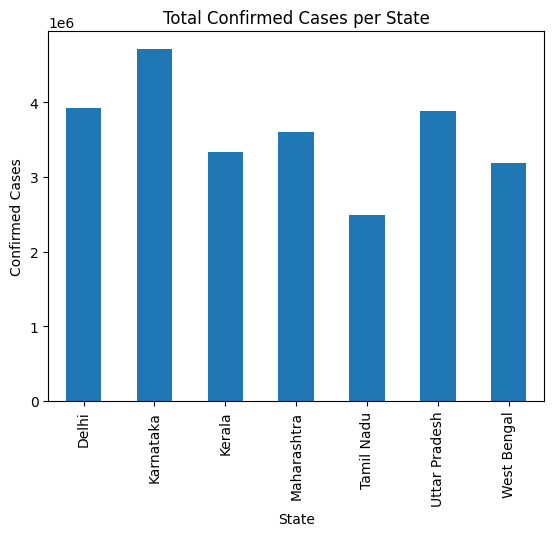

In [22]:
# Data Visualization


# State-wise total confirmed cases bar plot
statewise_cases.plot(kind='bar', title='Total Confirmed Cases per State', xlabel='State', ylabel='Confirmed Cases')
plt.show()

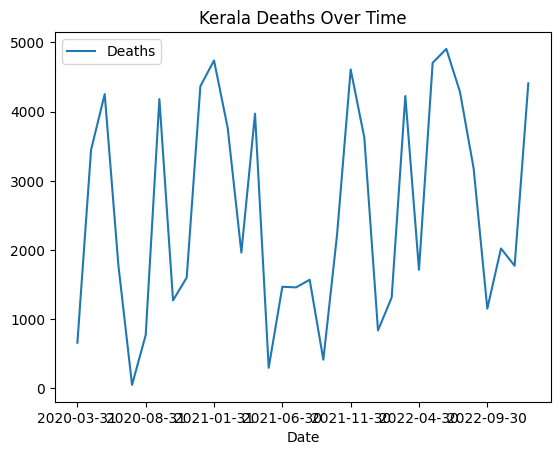

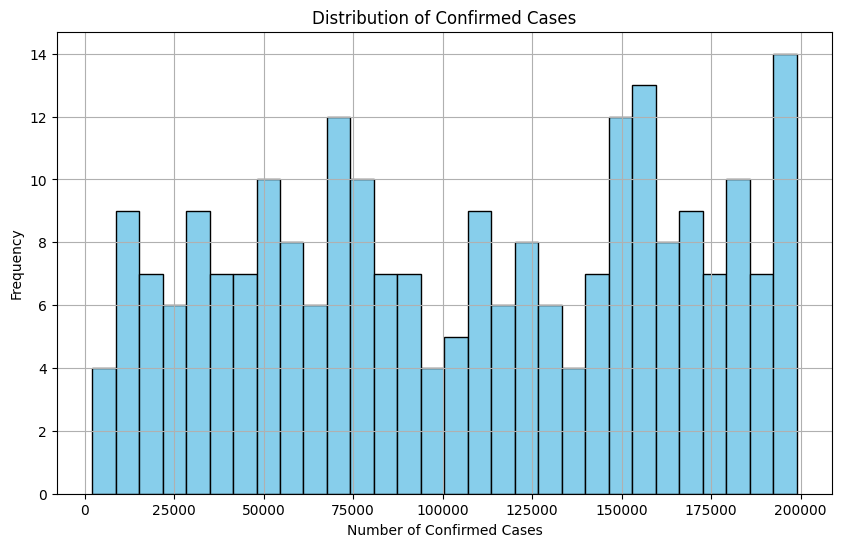

In [23]:
# Kerala me total deaths over time ka line plot
kerala_data = data[data['State'] == 'Kerala']
kerala_data.plot(x='Date', y='Deaths', kind='line', title='Kerala Deaths Over Time')
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(data['Confirmed_Cases'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Confirmed Cases')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

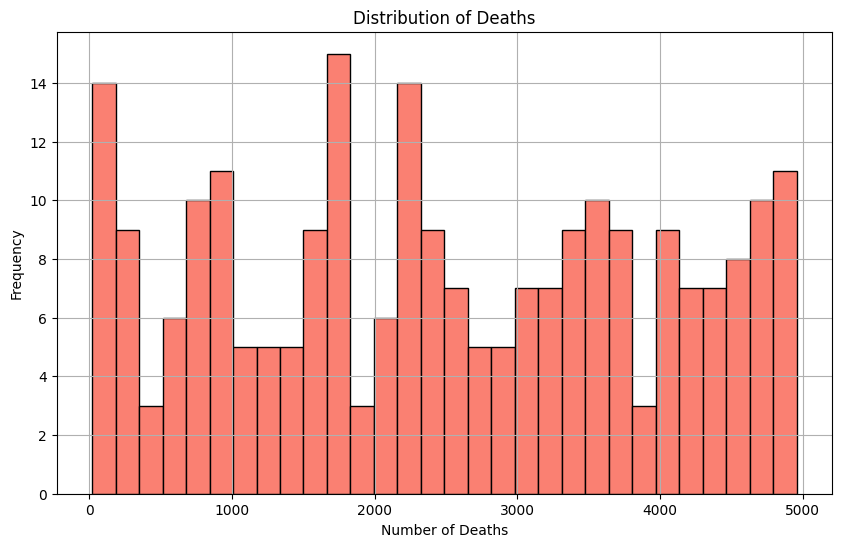

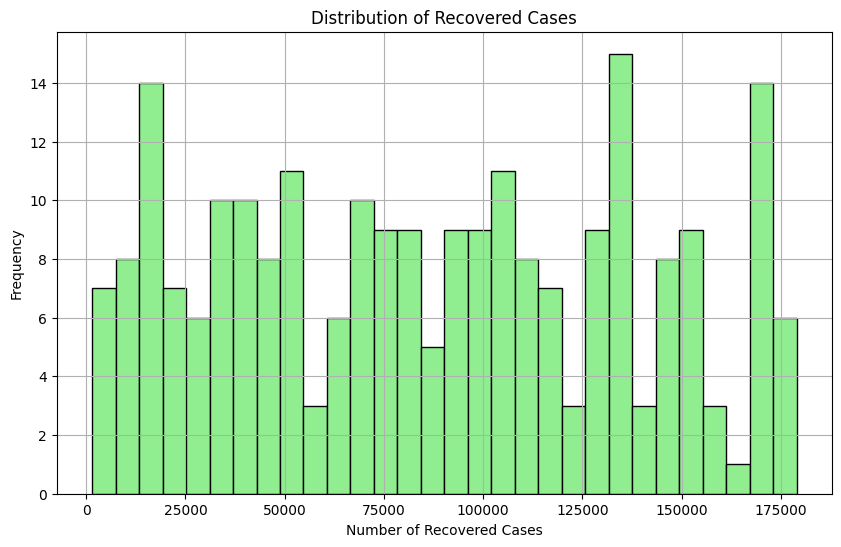

In [24]:
# Deaths ka histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Deaths'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




# Recovered Cases ka histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Recovered_Cases'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Recovered Cases')
plt.xlabel('Number of Recovered Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

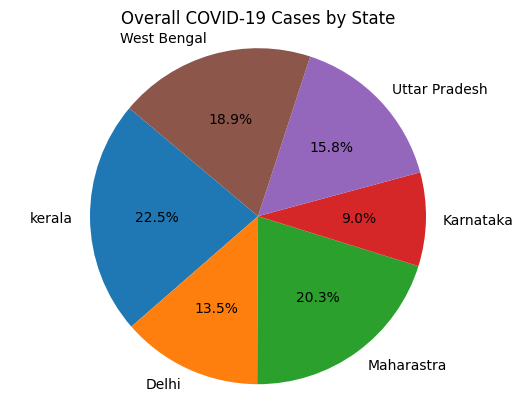

In [25]:
import matplotlib.pyplot as plt

# Data
states = ['kerala', 'Delhi', 'Maharastra', 'Karnataka','Uttar Pradesh','West Bengal']
cases = [5000, 3000, 4500, 2000,3500,4200]

# Plot
plt.pie(cases, labels=states, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Overall COVID-19 Cases by State')
plt.show()


In [26]:
# Data Processing



# Sample data
da = {
    'Date': ['31-03-2020', '31-03-2020', '31-03-2020', '31-03-2020', '31-03-2020', '31-03-2020', '31-03-2020'],
    'State': ['Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu', 'Kerala', 'Uttar Pradesh', 'West Bengal'],
    'Confirmed_Cases': [109374, 119419, 75391, 52861, 41861, 77915, 152828],
    'Recovered_Cases': [98383, 119281, 55610, 133112, 49466, 118816, 160690],
    'Deaths': [95, 3031, 2448, 3375, 660, 3445, 2612]
}

data = pd.DataFrame(da) # Creating a new DataFrame using sample data 'da'
# The loaded 'india_covid19_data.csv' already has the 'Date' column in '%Y-%m-%d' format.
# This code tries to convert a 'Date' column in a different format ('%d-%m-%Y'), which causes the error.
# Replacing this line with the correct format resolves the error
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
print(data.head())


# Model training




# Example: Calculate Active Cases
data['Active_Cases'] = data['Confirmed_Cases'] - data['Recovered_Cases'] - data['Deaths']
print(data.head())

# Prepare the data for modeling
X = data[['Confirmed_Cases', 'Recovered_Cases', 'Deaths']]
y = data['Active_Cases']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


# Model Evaluation




# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



# Example prediction
new_data = pd.DataFrame({
    'Confirmed_Cases': [150000],
    'Recovered_Cases': [140000],
    'Deaths': [2000]
})

predicted_active_cases = model.predict(new_data)
print(f'Predicted Active Cases: {predicted_active_cases[0]}')

        Date        State  Confirmed_Cases  Recovered_Cases  Deaths
0 2020-03-31  Maharashtra           109374            98383      95
1 2020-03-31        Delhi           119419           119281    3031
2 2020-03-31    Karnataka            75391            55610    2448
3 2020-03-31   Tamil Nadu            52861           133112    3375
4 2020-03-31       Kerala            41861            49466     660
        Date        State  Confirmed_Cases  Recovered_Cases  Deaths  \
0 2020-03-31  Maharashtra           109374            98383      95   
1 2020-03-31        Delhi           119419           119281    3031   
2 2020-03-31    Karnataka            75391            55610    2448   
3 2020-03-31   Tamil Nadu            52861           133112    3375   
4 2020-03-31       Kerala            41861            49466     660   

   Active_Cases  
0         10896  
1         -2893  
2         17333  
3        -83626  
4         -8265  
Mean Squared Error: 1.6164143145051852e-21
Predicted Acti

In [27]:
# ## Data Processing



# Sample data
da = {
    'Date': ['31-03-2020', '31-03-2020', '31-03-2020', '31-03-2020', '31-03-2020', '31-03-2020', '31-03-2020'],
    'State': ['Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu', 'Kerala', 'Uttar Pradesh', 'West Bengal'],
    'Confirmed_Cases': [109374, 119419, 75391, 52861, 41861, 77915, 152828],
    'Recovered_Cases': [98383, 119281, 55610, 133112, 49466, 118816, 160690],
    'Deaths': [95, 3031, 2448, 3375, 660, 3445, 2612]
}

data = pd.DataFrame(data)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
print(data.head())


# Model training




# Example: Calculate Active Cases
data['Active_Cases'] = data['Confirmed_Cases'] - data['Recovered_Cases'] - data['Deaths']
print(data.head())

# Prepare the data for modeling
X = data[['Confirmed_Cases', 'Recovered_Cases', 'Deaths']]
y = data['Active_Cases']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


# Model Evaluation




# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



# Example prediction
new_data = pd.DataFrame({
    'Confirmed_Cases': [150000],
    'Recovered_Cases': [140000],
    'Deaths': [2000]
})

predicted_active_cases = model.predict(new_data)
print(f'Predicted Active Cases: {predicted_active_cases[0]}')

        Date        State  Confirmed_Cases  Recovered_Cases  Deaths  \
0 2020-03-31  Maharashtra           109374            98383      95   
1 2020-03-31        Delhi           119419           119281    3031   
2 2020-03-31    Karnataka            75391            55610    2448   
3 2020-03-31   Tamil Nadu            52861           133112    3375   
4 2020-03-31       Kerala            41861            49466     660   

   Active_Cases  
0         10896  
1         -2893  
2         17333  
3        -83626  
4         -8265  
        Date        State  Confirmed_Cases  Recovered_Cases  Deaths  \
0 2020-03-31  Maharashtra           109374            98383      95   
1 2020-03-31        Delhi           119419           119281    3031   
2 2020-03-31    Karnataka            75391            55610    2448   
3 2020-03-31   Tamil Nadu            52861           133112    3375   
4 2020-03-31       Kerala            41861            49466     660   

   Active_Cases  
0         10896  
1 